## Analysis of MARUTI Stock data

This is an analysis of stock data of 20 years. I have used Previous day Volume, turnover and closing price along with current day opening price to predict the closing price of the current day. The values aren't accurate but they show the general trend in which the stock value changes. The code is consistent with other stock datasets also. the dataset is available on https://www.kaggle.com/rohanrao/nifty50-stock-market-data 

Import the basic Libraries

In [1]:
import numpy as np
import pandas as pd

Import the required file

In [2]:
dataset = pd.read_csv('MARUTI.csv')

In [3]:
dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,2020-06-24,MARUTI,EQ,5886.50,5938.00,5938.00,5730.00,5760.0,5755.35,5828.53,1268492,7.393445e+14,102407.0,343499.0,0.2708
4214,2020-06-25,MARUTI,EQ,5755.35,5677.00,5846.80,5651.00,5756.0,5762.30,5778.04,1266213,7.316230e+14,101597.0,233593.0,0.1845
4215,2020-06-26,MARUTI,EQ,5762.30,5800.00,5810.00,5695.00,5745.0,5754.90,5736.35,1063059,6.098075e+14,98170.0,161019.0,0.1515
4216,2020-06-29,MARUTI,EQ,5754.90,5730.00,5800.00,5650.00,5701.0,5678.70,5702.69,1102655,6.288101e+14,93831.0,225779.0,0.2048


In [4]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4.218000e+03,4.218000e+03,2247.000000,4.217000e+03,4217.000000
mean,2720.774443,2724.318836,2757.088182,2688.606508,2721.875154,2722.128947,2723.300239,1.197247e+06,2.117123e+14,51340.773921,3.649973e+05,0.392807
std,2645.137769,2649.336690,2672.173068,2621.579014,2645.140686,2645.271038,2646.841452,1.674455e+06,2.604774e+14,42554.293144,3.746657e+05,0.157400
min,125.000000,164.000000,168.700000,155.000000,164.000000,164.300000,165.060000,2.279600e+04,2.131518e+12,1096.000000,4.896000e+03,0.034300
25%,806.212500,808.250000,822.000000,790.100000,806.100000,806.262500,805.852500,4.168292e+05,6.069819e+13,21491.500000,1.603160e+05,0.276100
50%,1373.525000,1373.825000,1393.950000,1355.300000,1374.125000,1373.725000,1375.240000,6.711405e+05,1.049696e+14,40213.000000,2.706580e+05,0.396600
75%,4362.275000,4380.000000,4449.525000,4317.525000,4369.075000,4368.925000,4371.577500,1.197491e+06,2.742523e+14,65138.000000,4.510900e+05,0.506000
max,9832.450000,9966.000000,9996.400000,9725.000000,9846.000000,9832.450000,9850.960000,3.516428e+07,4.878992e+15,407715.000000,8.537695e+06,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4218 non-null   object 
 1   Symbol              4218 non-null   object 
 2   Series              4218 non-null   object 
 3   Prev Close          4218 non-null   float64
 4   Open                4218 non-null   float64
 5   High                4218 non-null   float64
 6   Low                 4218 non-null   float64
 7   Last                4218 non-null   float64
 8   Close               4218 non-null   float64
 9   VWAP                4218 non-null   float64
 10  Volume              4218 non-null   int64  
 11  Turnover            4218 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  4217 non-null   float64
 14  %Deliverble         4217 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 494.4

Modify the dataset according to what is required:  
We require only Date, Previous Closing rate, Closing rate, Volume and Turnover for the analysis


In [6]:
volume = dataset["Volume"]
turnover = dataset["Turnover"]

In [7]:
dataset1 = dataset[["Date","Prev Close","Close","Volume","Turnover"]]

In [8]:
dataset1

,Date,Prev Close,Close,Volume,Turnover
0,2003-07-09,125.00,164.30,35164283,5.835528e+14
1,2003-07-10,164.30,167.00,10464179,1.744820e+14
2,2003-07-11,167.00,173.35,11740117,2.024622e+14
3,2003-07-14,173.35,177.95,5982324,1.064313e+14
4,2003-07-15,177.95,176.20,6173689,1.092001e+14
...,...,...,...,...,...
4213,2020-06-24,5886.50,5755.35,1268492,7.393445e+14
4214,2020-06-25,5755.35,5762.30,1266213,7.316230e+14
4215,2020-06-26,5762.30,5754.90,1063059,6.098075e+14
4216,2020-06-29,5754.90,5678.70,1102655,6.288101e+14


In [9]:
dataset1.drop([0])

,Date,Prev Close,Close,Volume,Turnover
1,2003-07-10,164.30,167.00,10464179,1.744820e+14
2,2003-07-11,167.00,173.35,11740117,2.024622e+14
3,2003-07-14,173.35,177.95,5982324,1.064313e+14
4,2003-07-15,177.95,176.20,6173689,1.092001e+14
5,2003-07-16,176.20,177.10,3759085,6.675695e+13
...,...,...,...,...,...
4213,2020-06-24,5886.50,5755.35,1268492,7.393445e+14
4214,2020-06-25,5755.35,5762.30,1266213,7.316230e+14
4215,2020-06-26,5762.30,5754.90,1063059,6.098075e+14
4216,2020-06-29,5754.90,5678.70,1102655,6.288101e+14


In [10]:
#dataset1["Volume"] = volume
#dataset1["Turnover"] = turnover
#dataset1

In [11]:
unscaled_inputs = dataset1[["Date","Prev Close","Volume","Turnover"]]
unscaled_targets = dataset1["Close"]

Now we have to format the Date column into a time format and then convert it into a ordinal variable suitable for analysis

In [12]:
import datetime as dt

In [13]:
unscaled_inputs["Date"] = unscaled_inputs["Date"].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
unscaled_inputs

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Prev Close,Volume,Turnover
0,2003-07-09,125.00,35164283,5.835528e+14
1,2003-07-10,164.30,10464179,1.744820e+14
2,2003-07-11,167.00,11740117,2.024622e+14
3,2003-07-14,173.35,5982324,1.064313e+14
4,2003-07-15,177.95,6173689,1.092001e+14
...,...,...,...,...
4213,2020-06-24,5886.50,1268492,7.393445e+14
4214,2020-06-25,5755.35,1266213,7.316230e+14
4215,2020-06-26,5762.30,1063059,6.098075e+14
4216,2020-06-29,5754.90,1102655,6.288101e+14


In [14]:
unscaled_inputs['Date']=unscaled_inputs['Date'].map(dt.datetime.toordinal)
unscaled_inputs

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Prev Close,Volume,Turnover
0,731405,125.00,35164283,5.835528e+14
1,731406,164.30,10464179,1.744820e+14
2,731407,167.00,11740117,2.024622e+14
3,731410,173.35,5982324,1.064313e+14
4,731411,177.95,6173689,1.092001e+14
...,...,...,...,...
4213,737600,5886.50,1268492,7.393445e+14
4214,737601,5755.35,1266213,7.316230e+14
4215,737602,5762.30,1063059,6.098075e+14
4216,737605,5754.90,1102655,6.288101e+14


Now we should standardize the variables to make all variables free of bias to the model.  
Then we can make a seperate array for inputs and targets

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_inputs = np.array(scaler.fit(unscaled_inputs).transform(unscaled_inputs))

In [18]:
scaled_inputs

array([[-1.72253303, -0.98145444, 20.28782892,  1.42770401],
       [-1.72197509, -0.96659523,  5.53495267, -0.14294826],
       [-1.72141715, -0.96557436,  6.29704482, -0.03551662],
       ...,
       [ 1.73502253,  1.14999158, -0.08014758,  1.52851055],
       [ 1.73669635,  1.14719366, -0.05649768,  1.60147203],
       [ 1.73725429,  1.11838267,  0.48892879,  3.68099635]])

In [19]:
targets = np.array(unscaled_targets)
targets

array([ 164.3 ,  167.  ,  173.35, ..., 5754.9 , 5678.7 , 5838.3 ])

Shuffling isn't required in our analysis as the model isn't affeted by the sorted column of date. In order to cross check with the shuffled results, the below code can be used.

In [20]:
#shuffled_indices = np.arange(scaled_inputs.shape[0])
#np.random.shuffle(shuffled_indices)
#shuffled_inputs = scaled_inputs[shuffled_indices]
#shuffled_targets = targets[shuffled_indices]

#shuffled_indices = np.arange(scaled_inputs.shape[0])
#np.random.shuffle(shuffled_indices)
shuffled_inputs = scaled_inputs
shuffled_targets = targets

Now it's time to create Training, Validation and Testing sets.

In [21]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]



Using the data, let us now see the tensorflow model for the prediction of the stock price

In [22]:
import tensorflow as tf

In [23]:
input_size = 4
output_size = 1

hidden_layer_size = 100
    

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='relu') 
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


batch_size = 5

max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)


model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping], 
          validation_data=(validation_inputs, validation_targets),
          verbose = 0
          )  


In [24]:
outputs = model.predict(test_inputs)

A preliminary analysis of mean and standard deviation shows that the results are very scattered

In [25]:
list=[]
for i in range(len(outputs)):
    list.append((outputs[i]-test_targets[i])[0])
    #print((outputs[i]-test_targets[i])[0])
print(np.mean(list))
print(np.std(list))

133.19724
156.49945


In [26]:
outputdf = pd.DataFrame()

In [27]:
outputlist=[]
#index = shuffled_indices[train_samples_count+validation_samples_count:]
#index
for i in range(outputs.shape[0]):
    outputlist.append(outputs[i][0])
outputdf['Output'] = outputlist
outputdf['Targets'] = test_targets
outputdf["Index"] = np.arange(outputdf.shape[0])
#outputdf.sort(["Index"])
outputdf

,Output,Targets,Index
0,6833.601074,6985.85,0
1,7053.010742,6875.50,1
2,6998.979980,7287.20,2
3,7322.888184,7182.00,3
4,7218.643066,7150.90,4
...,...,...,...
418,6097.784668,5755.35,418
419,5972.842773,5762.30,419
420,5963.949707,5754.90,420
421,5957.952148,5678.70,421


The outliers in the distribution are replaced by the preceding output value

In [28]:
dist = outputdf["Output"]
q3 = np.percentile(dist, 75)
q1 = np.percentile(dist, 25)
iqr = q3 - q1
for i in range(1,dist.shape[0]):
    if dist[i] > (q3+iqr) :
        outputdf["Output"][i] = outputdf["Output"][i-1]
    if dist[i] < (q1-iqr) :
        outputdf["Output"][i] = outputdf["Output"][i-1]
outputdf


      

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Output,Targets,Index
0,6833.601074,6985.85,0
1,7053.010742,6875.50,1
2,6998.979980,7287.20,2
3,7322.888184,7182.00,3
4,7218.643066,7150.90,4
...,...,...,...
418,6097.784668,5755.35,418
419,5972.842773,5762.30,419
420,5963.949707,5754.90,420
421,5957.952148,5678.70,421


In [29]:
length=outputdf.shape[0]
mylist=[]
for i in range(length-1,-1,-1):
     mylist.append(dataset["Date"][dataset.shape[0]-i-1])
outputdf["Index"] = mylist
outputdf

,Output,Targets,Index
0,6833.601074,6985.85,2018-10-10
1,7053.010742,6875.50,2018-10-11
2,6998.979980,7287.20,2018-10-12
3,7322.888184,7182.00,2018-10-15
4,7218.643066,7150.90,2018-10-16
...,...,...,...
418,6097.784668,5755.35,2020-06-24
419,5972.842773,5762.30,2020-06-25
420,5963.949707,5754.90,2020-06-26
421,5957.952148,5678.70,2020-06-29


Let us now visualize the Actual and predicted values for 2018-2020

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

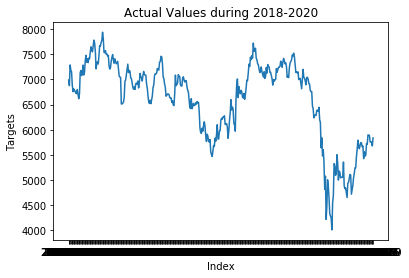

In [31]:
ax = sns.lineplot(x="Index", y="Targets", data=outputdf).set_title("Actual Values during 2018-2020")


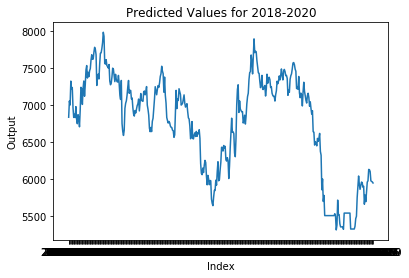

In [32]:
bx = sns.lineplot(x="Index", y="Output", data=outputdf).set_title("Predicted Values for 2018-2020")


We can observe that the values aren't accurate. Infact it varies by more than 100 rupees at times while we usually require accuracy to the tune of paise but the trend of the stock seems to be more or less similar to the actual.